In [3]:
import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

# Load Data & Plot

In [15]:
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

In [4]:
import os
audio_dir = os.path.join('..','data','audio_label_clip')
noise_dir = os.path.join('.','white_noise')

In [17]:
# 여기 파일명만 수정하기
# 아니면 loop 돌리는거 정돈 만들 수 있자냐?
data, sr = librosa.load(os.path.join(audio_dir,'u1722694_0.mp3'), sr=22050)
data.shape

(32600,)

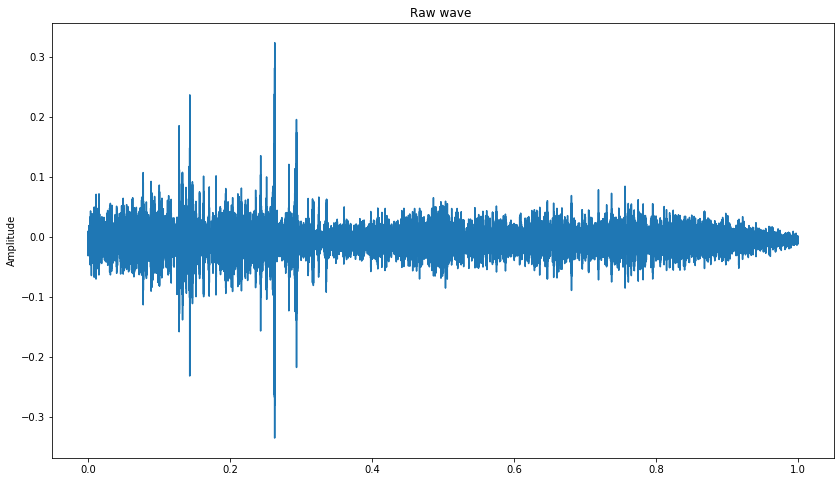

In [18]:
plot_time_series(data)

In [41]:
def wav_to_mp3(current_dir,filename):
    print(filename)
    subprocess.call(['ffmpeg','-i',
            os.path.join(current_dir,f'{filename}.wav'),
            os.path.join(current_dir,f'{filename}.mp3')
        ])
    subprocess.call(['rm',os.path.join(current_dir,f'{filename}.wav')])

# 1. Adding random noise 

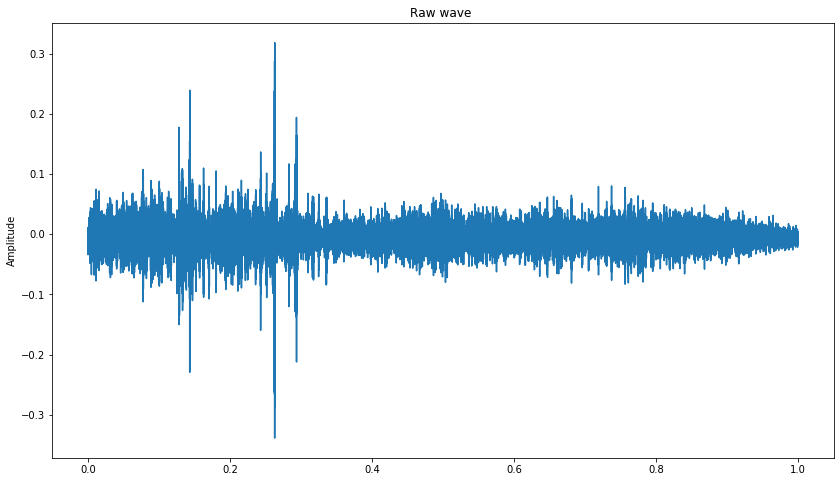

whitenoise
White Noise 저장 성공


0

In [110]:
import soundfile as sf
# import subprocess

def adding_random_noise(data, filename, sr=22050, noise_rate=0.005):
    # We limited the amplitude of the noise so we can still hear the word even with the noise, 
    # which is the objective
    rn = np.random.randn(len(data))
    data_rn = data + noise_rate*rn
    plot_time_series(data_rn)
    sf.write(os.path.join(audio_dir,f'{filename}.wav'), data_rn, sr)
    wav_to_mp3(audio_dir, filename)
    # bad sample 오류 뜸.
    # librosa.output.write_wav(os.path.join(audio_dir,'white_noise.wav'), data_rn, sr=sr) 
    # mp3로 변형하기

    print('White Noise 저장 성공')

    return 0

adding_random_noise(data,'whitenoise')

In [9]:
import os
from pydub import AudioSegment
AudioSegment.from_mp3(os.path.join(audio_dir,'Vehicle','4351_shift.mp3'))


# 2. Adding White noise
(헷갈리기 쉬운 음성 같이 더하기)

In [72]:
os.listdir(noise_dir)[0]

'12-Blender-10min.mp3'

In [90]:
import random
def adding_white_noise(sound_file, filename, sr=22050, noise_rate=0.005):
    # 길이 만큼 random 돌려서 걔 얻기
    file_list = os.listdir(noise_dir)
    noise_file_idx = random.randint(0,len(file_list)-1)
    noise_file = AudioSegment.from_file(os.path.join(noise_dir,file_list[noise_file_idx]))
    noise_file = noise_file-25
    new_sound = sound_file.overlay(noise_file)
    new_sound.export(os.path.join(audio_dir,f'{filename}.mp3'),format='mp3')
    print('White Noise 저장 성공')

    return 0

sound_file = AudioSegment.from_file(os.path.join(audio_dir,'u1722694_0.mp3'))
adding_white_noise(sound_file, 'white')

White Noise 저장 성공


0

# 3. Shifting the sound

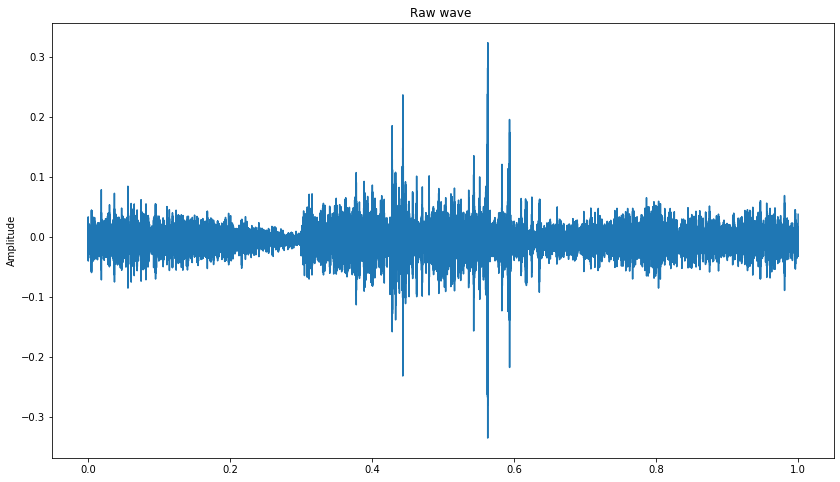

rolll
rolling_sound 저장 성공


In [53]:
def shifting_sound(data, filename, sr=22050, roll_rate=0.3):
    # 그냥 [1, 2, 3, 4] 를 [4, 1, 2, 3]으로 만들어주는건데 이게 효과있는지는 잘 모르겠
    data_roll = np.roll(data, int(len(data) * roll_rate))
    plot_time_series(data_roll)
    librosa.output.write_wav(os.path.join(audio_dir,f'{filename}.wav'), data_roll, sr=sr)
    wav_to_mp3(audio_dir, filename)
    print('rolling_sound 저장 성공')
    
shifting_sound(data,'rolll')

# 4. Stretching the sound

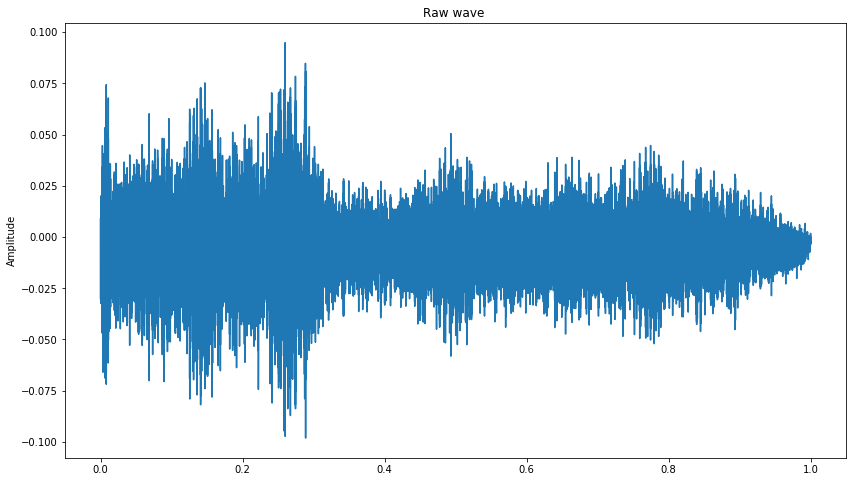

stretch
stretch_data 저장 성공


0

In [59]:
def stretch_sound(data, filename, sr=22050, rate=0.7):
    # stretch 해주는거 비율이 뭐가 좋은지 잘모르겟, 0.8이랑, 1.2랑 차이가 안나는거 같음
    stretch_data = librosa.effects.time_stretch(data, rate)
    plot_time_series(stretch_data)
    librosa.output.write_wav(os.path.join(audio_dir,f'{filename}.wav'), stretch_data, sr=sr)
    wav_to_mp3(audio_dir, filename)
    print('stretch_data 저장 성공')
    
    return 0

stretch_sound(data,'stretch')

# 5. reverse the sound

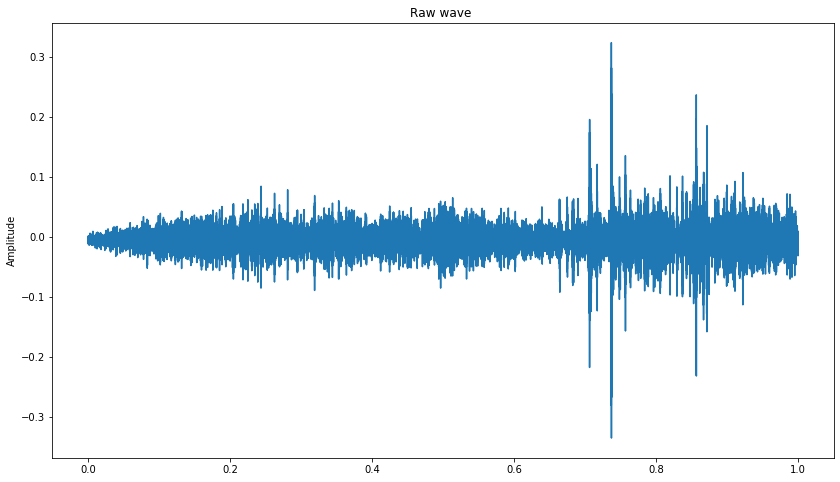

revesrse


0

In [67]:
def reverse_sound(data,filename, sr=22050):
    temp_array = []
    for i in range(len(data)):
        temp_array.append(data[len(data)-1-i])
    temp_numpy =np.asarray(temp_array)
    plot_time_series(temp_numpy)
    librosa.output.write_wav(os.path.join(audio_dir,f'{filename}.wav'), temp_numpy, sr=sr)
    wav_to_mp3(audio_dir, filename)
    return 0
reverse_sound(data,'revesrse')

# 6. Minus the sound

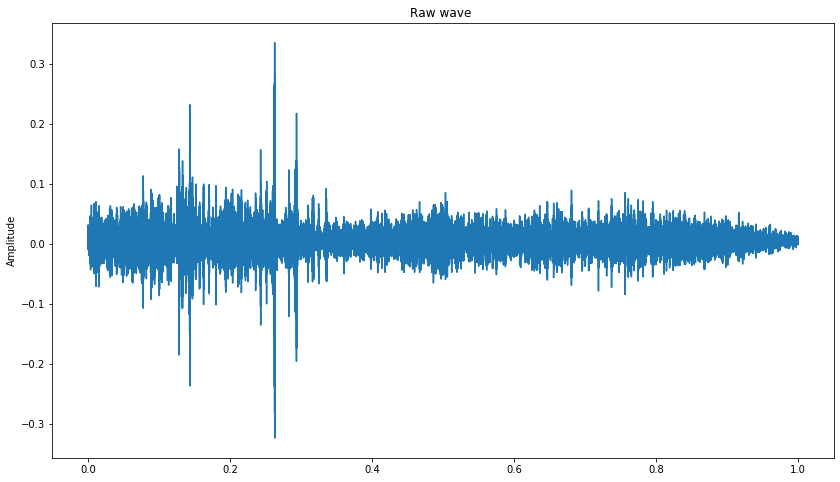

minus


0

In [66]:
# 원래파일이랑 거의 똑같이 들림
def minus_sound(data,filename, sr=22050):
    temp_numpy = (-1)*data
    plot_time_series(temp_numpy)
    librosa.output.write_wav(os.path.join(audio_dir,f'{filename}.wav'), temp_numpy, sr=sr)
    wav_to_mp3(audio_dir, filename)
    return 0
minus_sound(data,'minus', sr=22050)

# 7.Freqeuncy 변화

In [103]:
import librosa
import numpy as np

def freq_augmentation(data,filename):
    switch = np.random.randint(3)
    if(switch==0): #원본
        return [data,sr]
    elif(switch==1): #고음
        rate = np.random.uniform(2, 5)
    elif(switch==2): #저음
        rate = np.random.uniform(-5, -2)
    y = librosa.effects.pitch_shift(data, sr, n_steps=rate)
    librosa.output.write_wav(os.path.join(audio_dir,f'{filename}.wav'), y, sr=sr)
    wav_to_mp3(audio_dir, filename)

freq_augmentation(data,'freq_aug')

freq_aug


# 8. masking

(128, 64)


0

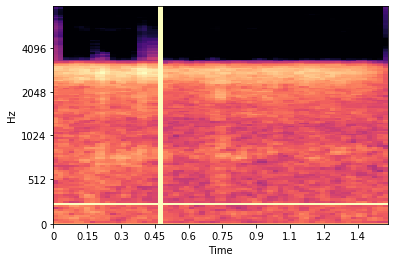

In [119]:
import librosa.display
# 단위별로 자른거라 다시 back하는건 불가능... 그러므로 이건 기각!
def minus_sound(data,filename, sr=22050):
    S = librosa.feature.melspectrogram(y=data, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)
    print(S_dB.shape)
    S_dB[10:11] = 0
    S_dB[:,20] = 0
    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
    return 0
minus_sound(data,'minus', sr=22050)
